# Assignment 2

1. Create a bar plot that shows distribution of german and british citizens in terms of age

<IPython.core.display.Javascript object>


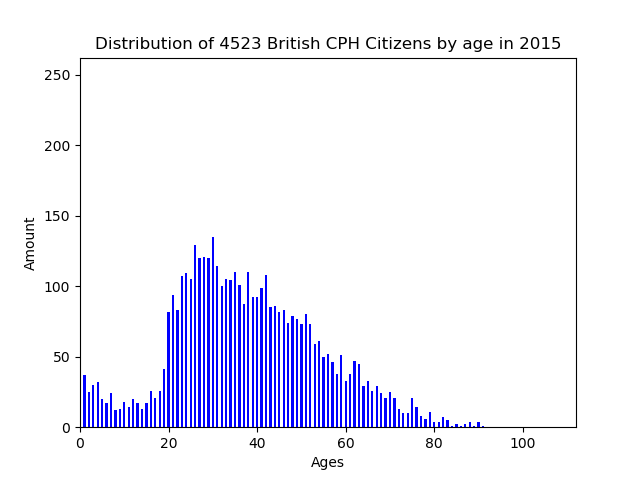

<IPython.core.display.Javascript object>


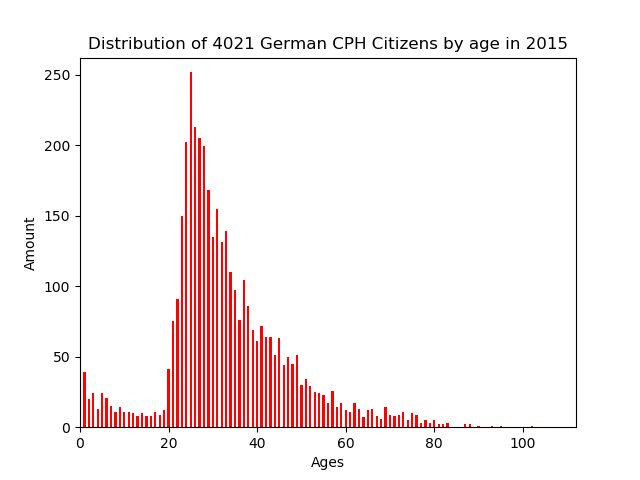

<IPython.core.display.Javascript object>


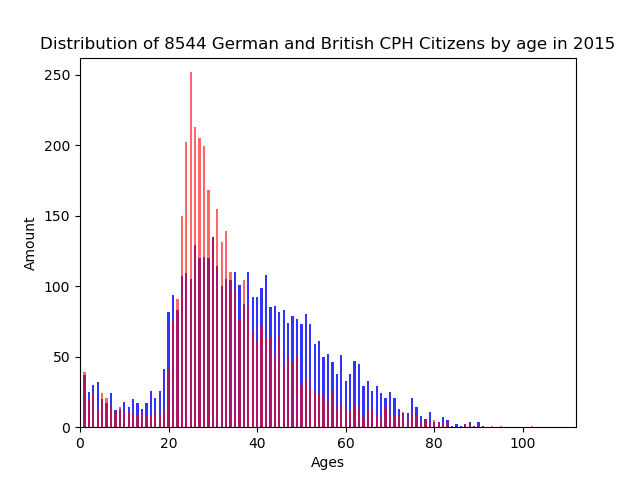

In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt
import kkdata

def get_population_stat(year_of_interest=2015):
    neighbourhoods = kkdata.STATISTICS[year_of_interest].keys()
    age_range = set([])
    for n in neighbourhoods:
        age_range.update(kkdata.STATISTICS[year_of_interest][n].keys())

    no_british_per_age = {}
    no_germans_per_age = {}

    for n in neighbourhoods:
        for age in age_range:
            if age in kkdata.STATISTICS[year_of_interest][n].keys():
                c_codes = set(kkdata.STATISTICS[year_of_interest][n][age].keys())
                
                if 5170 in c_codes:
                    no_british_per_age.setdefault(age, 0)
                    no_british_per_age[age] += kkdata.STATISTICS[year_of_interest][n][age][5170]
                    
                    c_codes.remove(5170)

                if 5180 in c_codes:
                    no_germans_per_age.setdefault(age, 0)
                    no_germans_per_age[age] += kkdata.STATISTICS[year_of_interest][n][age][5180]
                    
                    c_codes.remove(5180)
                    
    return no_british_per_age, no_germans_per_age

year = 2015
british_per_age, germans_per_age = get_population_stat(year)

def harmonize_collections(one, other):
    for k, v in one.items():
        if not k in other.keys():
            other[k] = 0
            
harmonize_collections(british_per_age, germans_per_age)
harmonize_collections(germans_per_age, british_per_age)
        
ages_b = list(british_per_age.keys())
no_citizens_b = list(british_per_age.values())

ages_g = list(germans_per_age.keys())
no_citizens_g = list(germans_per_age.values())

def setup_plot(title, no_citizens):
    plt.ticklabel_format(useOffset=False)
    plt.axis([0, max(ages_b) + 10, 0, max(no_citizens_g + no_citizens_b) + 10]) 
    title = title.format(sum(no_citizens), year)
    plt.title(title, fontsize=12)
    plt.xlabel("Ages", fontsize=10)
    plt.ylabel("Amount", fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)


def plot_histogram(x, y, color='blue', alpha=1.0):
    plt.bar(x, y, width=0.5, linewidth=0, align='center', color=color, alpha=alpha)

#def plot_histogram_stack(x, y, color='red'):
#    plt.bar(x, y, width=0.5, linewidth=0, align='center', color=color)

fig1 = plt.figure()
setup_plot('Distribution of {} British CPH Citizens by age in {}', no_citizens_b)
plot_histogram(ages_b, no_citizens_b)

fig2 = plt.figure()
setup_plot('Distribution of {} German CPH Citizens by age in {}', no_citizens_g)
plot_histogram(ages_g, no_citizens_g, color='red')

fig3 = plt.figure()
setup_plot('Distribution of {} German and British CPH Citizens by age in {}', no_citizens_g + no_citizens_b)
plot_histogram(ages_b, no_citizens_b, alpha=0.8)
plot_histogram(ages_g, no_citizens_g, 'red', alpha=0.6)
    
plt.show()

2. How many French are there compared to germans and how are they distributed over various neighbourhoods?

{1: 346, 2: 337, 3: 305, 4: 325, 5: 133, 6: 85, 7: 65, 8: 135, 9: 155, 10: 243, 99: 27}


<IPython.core.display.Javascript object>


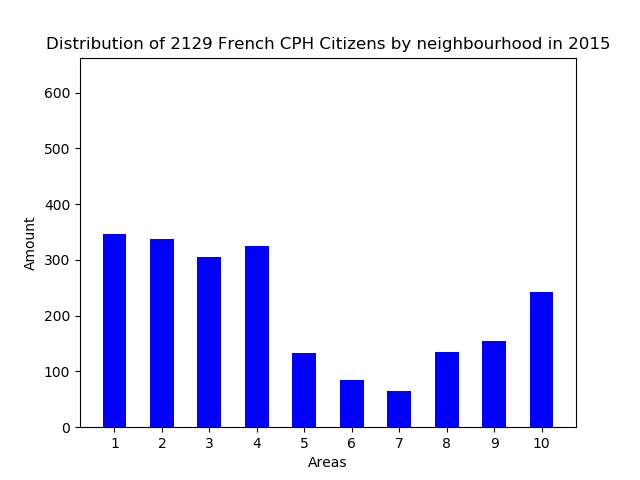

<IPython.core.display.Javascript object>


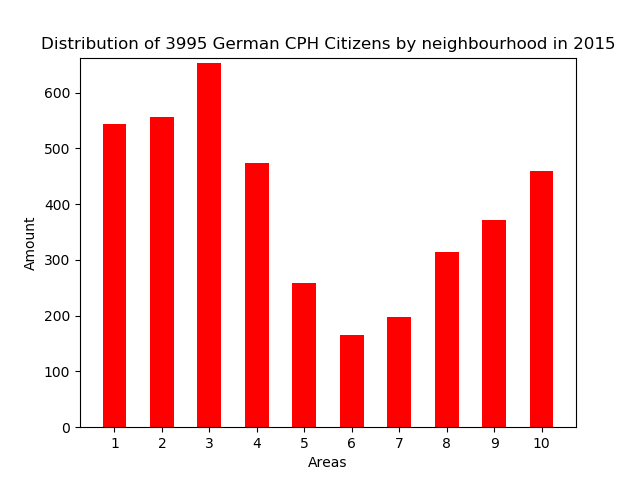

<IPython.core.display.Javascript object>


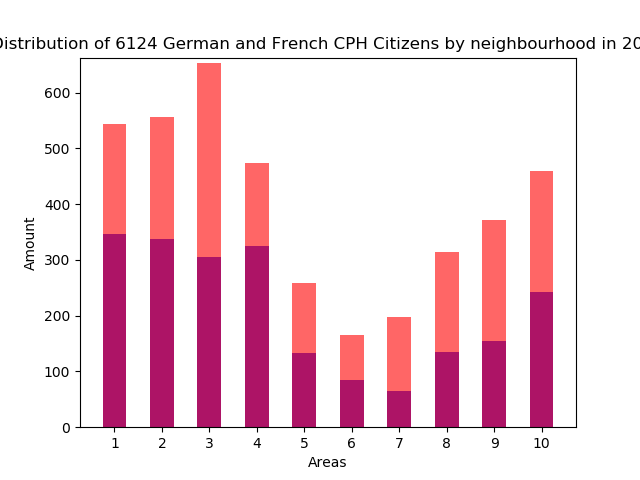

In [13]:
%matplotlib notebook
import matplotlib.pyplot as plt
import kkdata

def get_population_stat(year=2015):
    neighbourhoods = kkdata.STATISTICS[year].keys()
    age_range = set([])
    
    for n in neighbourhoods:
        age_range.update(kkdata.STATISTICS[year][n].keys())
        
    no_french_per_neighbourhood = {}
    no_germans_per_neighbourhood = {}

    for n in neighbourhoods:
        for age in age_range:
            if age in kkdata.STATISTICS[year][n].keys():
                c_codes = set(kkdata.STATISTICS[year][n][age].keys())
                
                if 5130 in c_codes:
                    no_french_per_neighbourhood.setdefault(n, 0)
                    no_french_per_neighbourhood[n] += kkdata.STATISTICS[year][n][age][5130]
                    
                    c_codes.remove(5130)

                if 5180 in c_codes:
                    no_germans_per_neighbourhood.setdefault(n, 0)
                    no_germans_per_neighbourhood[n] += kkdata.STATISTICS[year][n][age][5180]
                    
                    c_codes.remove(5180)                
    return no_french_per_neighbourhood, no_germans_per_neighbourhood

year = 2015
french_per_n, germans_per_n = get_population_stat(year)
print(french_per_n)
def harmonize_collections(one, other): 
    for k, v in one.items():
        if not k in other.keys():
            other[k] = 0
            
harmonize_collections(french_per_n, germans_per_n)
harmonize_collections(germans_per_n, french_per_n)
        
neighbourhoods_f = list(french_per_n.keys())
no_citizens_f = list(french_per_n.values())
neighbourhoods_f.pop()
no_citizens_f.pop()
 
neighbourhoods_g = list(germans_per_n.keys())
no_citizens_g = list(germans_per_n.values())
neighbourhoods_g.pop()
no_citizens_g.pop()

def setup_plot(title, no_citizens):
    plt.ticklabel_format(useOffset=False)
    #plt.axis([0, max(neighbourhoods_f), 0, max(no_citizens_g + no_citizens_f) + 10]) 
    plt.xticks(neighbourhoods_f)
    plt.ylim(0, max(no_citizens_g + no_citizens_f) + 10)
    title = title.format(sum(no_citizens), year)
    plt.title(title, fontsize=12)
    plt.xlabel("Areas", fontsize=10)
    plt.ylabel("Amount", fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)


def plot_histogram(x, y, color='blue', alpha=1.0):
    plt.bar(x, y, width=0.5, linewidth=0, align='center', color=color, alpha=alpha)

fig1 = plt.figure()
setup_plot('Distribution of {} French CPH Citizens by neighbourhood in {}', no_citizens_f)
plot_histogram(neighbourhoods_f, no_citizens_f)

fig2 = plt.figure()
setup_plot('Distribution of {} German CPH Citizens by neighbourhood in {}', no_citizens_g)
plot_histogram(neighbourhoods_g, no_citizens_g, color='red')

fig3 = plt.figure()
setup_plot('Distribution of {} German and French CPH Citizens by neighbourhood in {}', no_citizens_g + no_citizens_f)
plot_histogram(neighbourhoods_f, no_citizens_f, alpha=0.8)
plot_histogram(neighbourhoods_g, no_citizens_g, 'red', alpha=0.6)
    
plt.show()

3. Create a pie chart showing the 5 major citizen groups of age between 20-65

<IPython.core.display.Javascript object>


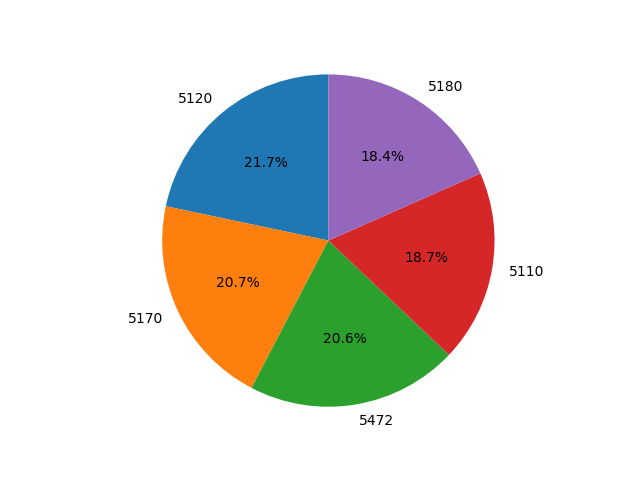

In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt
import kkdata

def get_citizen_dist(year=2015):
    citizenship_dist = {}
    for area in kkdata.STATISTICS[year].keys():
        for age in kkdata.STATISTICS[year][area]:
            for citizen_code in kkdata.STATISTICS[year][area][age]:
                citizenship_dist[citizen_code] = citizenship_dist.get(citizen_code, 0)+kkdata.STATISTICS[year][area][age][citizen_code]
    return citizenship_dist

def get_top_5(data):
    so = sorted(data.items(), key=lambda x: x[1], reverse=True)
    so5 = so[:6]
    return {tup[0]:tup[1] for tup in so5}

top_nationals = get_top_5(get_citizen_dist(2015))
del top_nationals[5100]

fig1, ax1 = plt.subplots()
ax1.pie(top_nationals.values(), labels=top_nationals.keys(), autopct='%1.1f%%', shadow=False, startangle=90) #autopct='%1.1f%%'
ax1.axis('equal')
plt.show()